In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('houseprice.csv', usecols=["SalePrice", "MSSubClass", "MSZoning","LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [3]:
df.shape

(1201, 10)

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [8]:
for i in df.columns:
    print("Column name {} has unique values {}".format(i,len(df[i].unique())))

Column name MSSubClass has unique values 15
Column name MSZoning has unique values 5
Column name LotFrontage has unique values 110
Column name LotArea has unique values 869
Column name Street has unique values 2
Column name LotShape has unique values 4
Column name YearBuilt has unique values 112
Column name 1stFlrSF has unique values 678
Column name 2ndFlrSF has unique values 368
Column name SalePrice has unique values 597


In [10]:
import datetime
df['Total Years'] = datetime.datetime.now().year-df['YearBuilt']

In [12]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,20
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,47
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,22
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,108
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,23


In [13]:
df.drop("YearBuilt",axis = 1,inplace=True)

In [15]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [16]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,20
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,47
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,22
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,108
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,23


In [17]:
cat_features = ["MSSubClass","MSZoning","Street","LotShape"]

In [18]:
out_features = "SalePrice"

In [20]:
df["MSSubClass"].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85])

In [21]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [24]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [25]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,20
1,0,3,80.0,9600,1,3,1262,0,181500,47
2,5,3,68.0,11250,1,0,920,866,223500,22
3,6,3,60.0,9550,1,0,961,756,140000,108
4,5,3,84.0,14260,1,0,1145,1053,250000,23
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,24
1456,0,3,85.0,13175,1,3,2073,0,210000,45
1457,6,3,66.0,9042,1,3,1188,1152,266500,82
1458,0,3,68.0,9717,1,3,1078,0,142125,73


In [26]:
import numpy as np
cat_features = np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [27]:
#We converted the cat features into numpy arrays, now we are going to convert numy arrays into tensors

import torch
cat_features = torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [29]:
### Crreate Continous Variables
cont_features = []
for i in df.columns:
    if i in ["MSSubClass","MSZoning","Street","LotShape"]:
        pass
    else:
        cont_features.append(i)





In [38]:
cont_features = ['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF','Total Years']

In [39]:
cont_values = np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    20.],
        [   80.,  9600.,  1262.,     0.,    47.],
        [   68., 11250.,   920.,   866.,    22.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    82.],
        [   68.,  9717.,  1078.,     0.,    73.],
        [   75.,  9937.,  1256.,     0.,    58.]])

In [40]:
cont_values.dtype

torch.float32

In [41]:
y = torch.tensor(df["SalePrice"].values,dtype=torch.float).reshape(-1,1)

In [42]:
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [44]:
cat_features.shape, cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [45]:
len(df['MSSubClass'].unique())

15

In [47]:
cat_dims=[len(df[col].unique()) for col in ["MSSubClass","MSZoning","Street","LotShape"]]
cat_dims

[15, 5, 2, 4]

In [48]:
###Output dimension should be set based on the input dimension
###It should be min(50,feature dimension/2)
embedding_dim = [(x, min(50,(x+1)//2)) for x in cat_dims]
embedding_dim



###these were the data pre processing steps


[(15, 8), (5, 3), (2, 1), (4, 2)]

In [49]:
###Now we will be dealing with Neural network
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim]) 


In [50]:
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [51]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [52]:
cat_featuresz=cat_features[:4]

In [53]:
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [54]:
pd.set_option('display.max_rows', 500)
embedding_val = []
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))
    

In [55]:
embedding_val

[tensor([[ 0.6039,  1.4601, -0.1042,  ...,  0.5993,  0.0503, -0.4852],
         [-0.2913,  0.1974, -0.7821,  ...,  0.0655,  0.3408,  1.9668],
         [ 0.6039,  1.4601, -0.1042,  ...,  0.5993,  0.0503, -0.4852],
         ...,
         [-0.3359, -0.1542, -0.8873,  ..., -0.1793, -0.5246, -1.3044],
         [-0.2913,  0.1974, -0.7821,  ...,  0.0655,  0.3408,  1.9668],
         [-0.2913,  0.1974, -0.7821,  ...,  0.0655,  0.3408,  1.9668]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.6304, -0.5570,  1.2805],
         [ 0.6304, -0.5570,  1.2805],
         [ 0.6304, -0.5570,  1.2805],
         ...,
         [ 0.6304, -0.5570,  1.2805],
         [ 0.6304, -0.5570,  1.2805],
         [ 0.6304, -0.5570,  1.2805]], grad_fn=<EmbeddingBackward0>),
 tensor([[-2.6019],
         [-2.6019],
         [-2.6019],
         ...,
         [-2.6019],
         [-2.6019],
         [-2.6019]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.1214, 0.3700],
         [0.1214, 0.3700],
         [0.0224, 1.2223],

In [56]:
z = torch.cat(embedding_val, 1)

In [58]:
z.shape

torch.Size([1201, 14])

In [59]:
### Implementing the dropout layer
#
dropout = nn.Dropout(.4)

In [60]:
final_embed = dropout(z)
final_embed

tensor([[ 0.0000,  2.4335, -0.1737,  ..., -0.0000,  0.2023,  0.6167],
        [-0.4855,  0.3289, -1.3035,  ..., -0.0000,  0.2023,  0.0000],
        [ 1.0066,  2.4335, -0.1737,  ..., -4.3365,  0.0000,  2.0371],
        ...,
        [-0.5598, -0.2569, -0.0000,  ..., -4.3365,  0.2023,  0.0000],
        [-0.4855,  0.3289, -1.3035,  ..., -4.3365,  0.2023,  0.6167],
        [-0.4855,  0.3289, -1.3035,  ..., -0.0000,  0.0000,  0.6167]],
       grad_fn=<MulBackward0>)

In [75]:
### Now we will create our neural network
class FeedForwardNN(nn.Module):
    def __init__(self, embedding_dim, n_count, out_sz, layers, p = 0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_count)

        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_count

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i

        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)


    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont],1)
        x = self.layers(x)
        return x
        

In [76]:
len(cont_features)


5

In [77]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p = 0.4)

In [78]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [79]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [80]:
df.shape

(1201, 10)

In [81]:
cont_values


tensor([[   65.,  8450.,   856.,   854.,    20.],
        [   80.,  9600.,  1262.,     0.,    47.],
        [   68., 11250.,   920.,   866.,    22.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    82.],
        [   68.,  9717.,  1078.,     0.,    73.],
        [   75.,  9937.,  1256.,     0.,    58.]])

In [82]:
cont_values.shape

torch.Size([1201, 5])

In [83]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [84]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)


(1020, 180, 1020, 180, 1020, 180)

In [102]:
for i in range(epochs):
    final_losses[i] = final_losses[i].detach().numpy()

Text(0.5, 0, 'epoch')

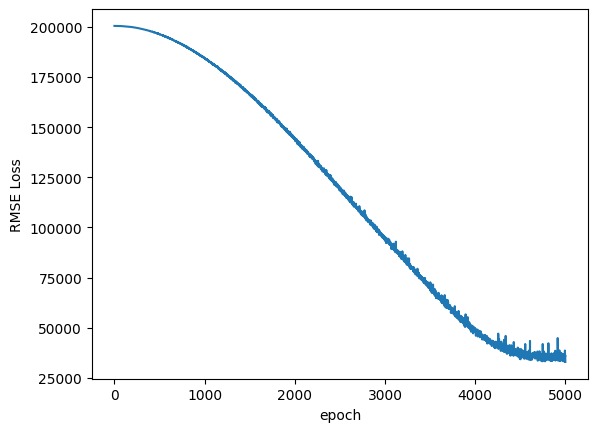

In [100]:
epochs = 5000
final_losses = []
for i in range(epochs):
    i = i+1
    y_pred=model(train_categorical,train_cont)
    loss = torch.sqrt(loss_function(y_pred,y_train))
    final_losses.append(loss)
    if i%10 == 1:
        print("Epoch number: {} and the loss: {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss: 36025.31640625
Epoch number: 11 and the loss: 36316.1328125
Epoch number: 21 and the loss: 34822.9140625
Epoch number: 31 and the loss: 35646.40625
Epoch number: 41 and the loss: 35674.8515625
Epoch number: 51 and the loss: 36501.9453125
Epoch number: 61 and the loss: 34823.07421875
Epoch number: 71 and the loss: 36074.265625
Epoch number: 81 and the loss: 34687.96484375
Epoch number: 91 and the loss: 34647.16796875
Epoch number: 101 and the loss: 35084.3515625
Epoch number: 111 and the loss: 35668.5078125
Epoch number: 121 and the loss: 33930.29296875
Epoch number: 131 and the loss: 34193.7890625
Epoch number: 141 and the loss: 34507.5390625
Epoch number: 151 and the loss: 37651.25390625
Epoch number: 161 and the loss: 42750.91015625
Epoch number: 171 and the loss: 35539.65625
Epoch number: 181 and the loss: 34266.62109375
Epoch number: 191 and the loss: 34696.8125
Epoch number: 201 and the loss: 33663.75
Epoch number: 211 and the loss: 34236.375
Epoch nu

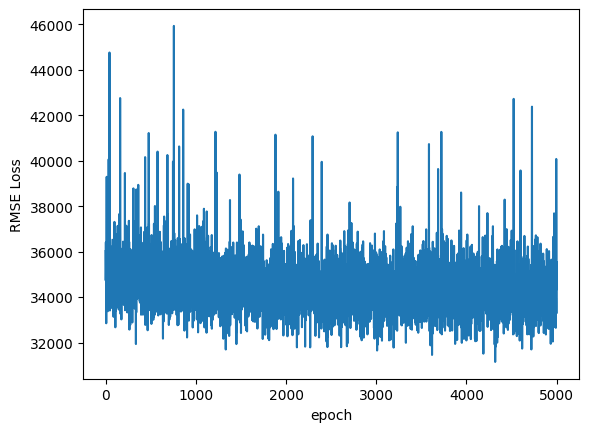

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [104]:
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 47413.75390625


In [105]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [106]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [107]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,134391.656250,-4391.656250
1,138887.0,113305.656250,25581.343750
2,175500.0,166855.062500,8644.937500
3,195000.0,237096.125000,-42096.125000
4,142500.0,184525.984375,-42025.984375


In [108]:
torch.save(model,"HousePrice.pt")

In [ ]:
torch.s